In [1]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&access_type=offline
waiting for authentication ...
authentication succeeded


,daniel.riveraa@udea.edu.coDANIEL FELIPE RIVERA ARROYAVEgoogle id: 107960807606835866040authorization code: 4/aAAJLTi2QEocniSAXUjbPmY14Fe3tUwccEwae2D9WqQkv20HK3q7gqvjHMGnRS_Y7tvZcon9fyfHOhUyDru_rFg


## Ejercicio 1

crea el constructor de un grafo que se representa como una lista de nodos conectados para cada nodo. Por ejemplo:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)])
    print g1.nodes

    > {0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
    
o también en el caso de un grafo dirigido:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
    print g1.nodes
    
    > {0: [1, 2, 3], 1: [2, 3], 2: [1, 3], 3: []}

observa que, 

- si tenemos un grafo dirigido y el lado $(V_i, V_j)$, entonces $i$ ha de estar en la lista de nodos de $j$ y viceversa.
- en cambio, con un grafo dirigido, sólo $i$ ha de estar en la lista de nodos de $j$.
- la lista de nodos conectados con cada nodo ha de quedar **compacta**, no puede haber nodos repetidos. P.ej. si en la lista de lados se encuentran ambos (5,1) y (1,5), o hay lados repetidos.

In [130]:
import itertools
import numpy as np
edge_list=[(0, 1), (0, 2,5), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)]
print set(itertools.chain.from_iterable(edge_list))


set([0, 1, 2, 3, 5])


In [131]:
b=[]
b=np.unique(b)
print b

[]


In [132]:
%%writefile ./utils/student_function/PS08_01.py
import numpy as np
import itertools
class Graph:
    
    def __init__(self, num_nodes, edge_list, is_directed=False):
        
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes
        
        self.nodes ={}
    
        if (is_directed):
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                b=list(np.unique(b))
                self.nodes[j]=b
        else:
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                    if i[1]==j:     
                        b.append(i[0])
                b=list(np.unique(b))
                self.nodes[j]=b
        
       


Overwriting ./utils/student_function/PS08_01.py


prueba tu código

In [133]:
import PS08_01 as st
reload(st)
g1 = st.Graph(9, [(8, 4), (0, 1), (3, 0), (6, 8), (8, 4), (3, 4), (0, 6), (1, 2), (0, 7)])
print g1.nodes

{0: [1, 3, 6, 7], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 8], 5: [], 6: [0, 8], 7: [0], 8: [4, 6]}


In [134]:
g1 = st.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
print g1.nodes

{0: [1, 2, 3], 1: [2, 3], 2: [1, 3], 3: []}


#### comprueba tu código con el corrector automático

In [135]:
!./run CHECK_SOLUTION PS08_01


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [51]:
!./run SUBMIT_SOLUTION PS08_01

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS08, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered


## Ejercicio 2

completa el método `as_nx` para crear el grafo de `networkx` correspondiente. Revisa la documentación de `networkx.Graph` y de `networkx.DiGraph`. Ten en cuenta que:

- la clase para grafos no dirigidos es `networkx.Graph`
- la clase para grados dirigidos es `networkx.DiGraph`
- en cualquiera de los dos casos el método para añadir nodos es `add_nodes_from`
- en cualquiera de los dos casos el método para añadir lados es `add_edge`

Una vez hayas implementado tu método, puedes usar `draw` para visualizar el grafo.

In [136]:
%%writefile ./utils/student_function/PS08_02.py
import numpy as np
import networkx as nx

class Graph:
    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes
        
        self.nodes ={}
    
        if (is_directed):
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                b=list(np.unique(b))
                self.nodes[j]=b
        else:
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                    if i[1]==j:     
                        b.append(i[0])
                b=list(np.unique(b))
                self.nodes[j]=b
                
    def as_nx(self):
        if (self.is_directed):
             g=nx.DiGraph(self.nodes)
        else:
            g=nx.Graph(self.nodes)
           
        return g
    
    def draw(self):
        ng = self.as_nx()
        nx.drawing.draw(ng, arrows=self.is_directed, with_labels=True, 
                        node_alpha=.2, node_color="blue", 
                        node_size=900, font_color="white")

Overwriting ./utils/student_function/PS08_02.py


In [137]:
import networkx as nx


prueba tu código

{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3, 4], 3: [0, 2, 4], 4: [2, 3]}


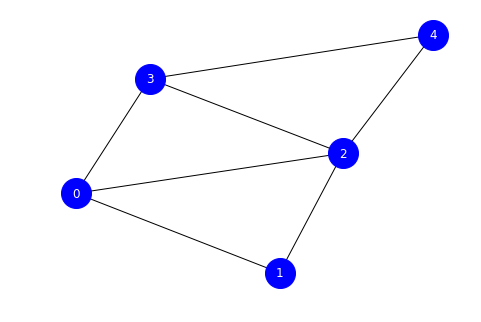

In [138]:
import PS08_02 as st
reload(st)
import matplotlib.pyplot as plt
%matplotlib inline

g1 = st.Graph(5, [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2,4), (3,4)])
g1.draw()
print g1.nodes

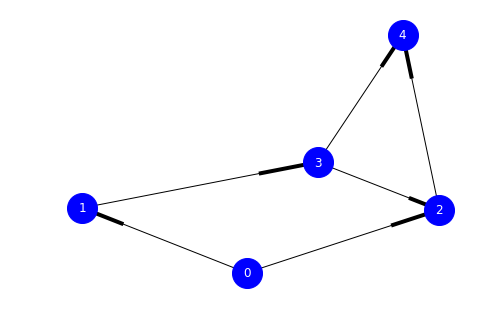

In [139]:
g2 = st.Graph(5, [(0,1), (0,2), (1,3), (2,4), (3,4), (3,2)], is_directed=True)
g2.draw()

In [65]:
!./run CHECK_SOLUTION PS08_02


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [66]:
!./run SUBMIT_SOLUTION PS08_02

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS08, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered


## Ejercicio 3

implementa los métodos indicados para tu clase con la implementación del grafo como un diccionario de listas de nodos conectados.

In [17]:
%%writefile ./utils/student_function/PS08_03.py
import numpy as np
import networkx as nx
class Graph():

    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        self.edge_list=edge_list
        self.is_directed = is_directed
        self.num_nodes   = num_nodes        
        self.nodes ={}
    
        if (is_directed):
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                b=list(np.unique(b))
                self.nodes[j]=b
        else:
            for j in range(num_nodes):
                b=[]
                for i in edge_list:
                    if i[0]==j:
                        b.append(i[1])
                    if i[1]==j:     
                        b.append(i[0])
                b=list(np.unique(b))
                self.nodes[j]=b
    
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
       
        self.assert_valid_node_number(node_number)
        return len(self.nodes[node_number])
    
    def grade_out(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)     
        return len(self.nodes[node_number])

    def grade_in(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)
        aux=[]
        for i in range(len(self.nodes)):
            aux=aux+self.nodes[i]
        return aux.count(node_number)

    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        if node_number_2 in self.nodes[node_number_1] or node_number_1 in self.nodes[node_number_2]:
            return True
        return False

    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        if self.is_directed:
            for i in range(len(trayectory)-1):
                if not trayectory[i+1] in self.nodes[trayectory[i]]:return False
        else:
            for i in range(len(trayectory)-1):
                if not self.are_adyacent(trayectory[i],trayectory[i+1]):return False
        return True
    
    def as_nx(self):
        if (self.is_directed):
             g=nx.DiGraph(self.nodes)
        else:
            g=nx.Graph(self.nodes)
           
        return g
    
    def draw(self):
        ng = self.as_nx()
        nx.drawing.draw(ng, arrows=self.is_directed, with_labels=True, 
                        node_alpha=.2, node_color="blue", 
                        node_size=900, font_color="white")

Overwriting ./utils/student_function/PS08_03.py


In [6]:
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"  
        for i in range(len(trayectory)-1):
            if not self.are_adyacent(trayectory[i],trayectory[i+1]):return False
        return True

In [7]:
import PS08_03 as st
reload(st)

g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)],True)
g2 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
print g1.nodes
g1.nodes[i]
print aux
for i in range(g1.num_nodes):
    print "node",i, ", grade =", g1.grade(i)    

{0: [1, 2], 1: [2, 3], 2: [3], 3: []}


NameError: name 'i' is not defined

In [ ]:
g3 = st.Graph(6,[(3, 2), (1, 5), (4, 1), (5, 0), (1, 0), (4, 3), (3, 5), (3, 0), (0, 4), (4, 0), (4, 1), (4, 3), (4, 0), (2, 3), (5, 0)])
print g3.nodes
t1 = [1, 4, 0, 5, 3, 2]
def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        if self.is_directed:
            for i in range(len(trayectory)-1):
                if not trayectory[i+1] in self.nodes[trayectory[i]]
        else:
            for i in range(len(trayectory)-1):
                if not self.are_adyacent(trayectory[i],trayectory[i+1]):return False
        return True
print g3.is_valid_trayectory(t1)
print is_valid_trayectory(g3,t1)


In [8]:

print g3.are_adyacent(0,1)
print g3.are_adyacent(3,2)
print g3.are_adyacent(0,3)


NameError: name 'g3' is not defined

In [9]:
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 1]
t3 = [ 2,0,1,0]
print "          trayectory    is_valid "
for t in [t1, t2, t3]:
    print "%20s"%str(t), "%10s"%g3.is_valid_trayectory(t)

          trayectory    is_valid 
        [0, 1, 2, 3]

NameError: name 'g3' is not defined

#### comprueba tu código con el corrector automático

In [18]:
!./run CHECK_SOLUTION PS08_03


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [19]:
!./run SUBMIT_SOLUTION PS08_03

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS08, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered


## Ejercicio 4

Realiza el constructor para que inicialice una representación como una matriz de incidencia. Asumamos que tenemos **solamente grafos NO dirigidos**, no tengas el cuenta el caso de grafos dirigidos.

Una **matric de incidencia** es una matriz de m filas y n columnas siendo:

- m = número vértices del grafo.
- n = número lados del grafo.

Lo anterior implica que debemos numerar los lados del grafo. Dicha numeración se hace aleatoriamente, o se puede hacer en secuencia con la lista de lados (edges).

Fíjate en el siguiente grafo de ejemplo y la matriz de incidencia asociada cualquier columna tiene exactamente dos elementos a 1:

    g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
    g2.inc_matrix
    
    > [[0 1 0 1 0 0]
    >  [1 0 0 1 1 0]
    >  [0 1 1 0 0 1]
    >  [0 0 0 0 1 0]
    >  [1 0 0 0 0 0]
    >  [0 0 1 0 0 0]
    >  [0 0 0 0 0 1]]
    

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%writefile ./utils/student_function/PS08_04.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
            
        self.num_nodes   = num_nodes
        self.inc_matrix=np.zeros((num_nodes,len(edge_list)),int)
        a=0
        for i,j in edge_list:
            self.inc_matrix[i][a]=1
            self.inc_matrix[j][a]=1
            a+=1

Overwriting ./utils/student_function/PS08_04.py


In [4]:
import PS08_04 as st
reload(st)
g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
print g2.inc_matrix

[[0 1 0 1 0 0]
 [1 0 0 1 1 0]
 [0 1 1 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]


In [5]:
k = g2.inc_matrix
k.sum(axis=0)
k.sum(axis=1)

array([2, 3, 3, 1, 1, 1, 1])

#### comprueba tu código con el corrector automático

In [6]:
!./run CHECK_SOLUTION PS08_04


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [7]:
!./run SUBMIT_SOLUTION PS08_04

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS08, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered


## Ejercicio 5

implementa los métodos siguientes para la clase anterior con matrices de incidencia:

- `grade`
- `are_adyacent`
- `is_valid_trayectory`

In [78]:
%%writefile ./utils/student_function/PS08_05.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
            
        self.num_nodes   = num_nodes
        self.inc_matrix=np.zeros((num_nodes,len(edge_list)),int)
        a=0
        for i,j in edge_list:
            self.inc_matrix[i][a]=1
            self.inc_matrix[j][a]=1
            a+=1
    
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
        self.assert_valid_node_number(node_number)
        
        return self.inc_matrix.sum(axis=1)[node_number] 
    
    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        
        for a in range(self.inc_matrix.shape[1]):
            if self.inc_matrix[node_number_1][a]==1 and self.inc_matrix[node_number_2][a]==1:return True
        return False
        
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        for i in range(len(trayectory)-1):
                if not self.are_adyacent(trayectory[i],trayectory[i+1]):return False
        
        return True

Overwriting ./utils/student_function/PS08_05.py


In [79]:
import PS08_05 as st
reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
for i in range(g1.num_nodes):
    print "node",i, ", grade =", g1.grade(i)    

node 0 , grade = 2
node 1 , grade = 3
node 2 , grade = 3
node 3 , grade = 2


In [80]:
print g1.are_adyacent(0,1)
print g1.are_adyacent(3,2)
print g1.are_adyacent(0,3)


True
True
False


In [81]:
g3 = st.Graph(4, [(0,1), (1,0), (1,2), (2,0), (2,3)])
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 3,1]
t3 = [ 2,0,1,0]
print "          trayectory    is_valid "
for t in [t1, t2, t3]:
    print "%20s"%str(t), "%10s"%g3.is_valid_trayectory(t)

          trayectory    is_valid 
        [0, 1, 2, 3]       True
        [0, 2, 3, 1]      False
        [2, 0, 1, 0]       True


#### comprueba tu código con el corrector automático

In [82]:
!./run CHECK_SOLUTION PS08_05


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [8]:
!./run SUBMIT_SOLUTION PS08_05

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS08, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered
